# Stroke Prediction Project

In [1]:

#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import train_test_split ,cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 

In [3]:
# get the data
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 values are missing from bmi column.

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Minimum age reported in dataset is 0.0 and maximum 82.00. The avg bmi is 28.89. The Highest avg_glucose value reported is 2710.74

In [7]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

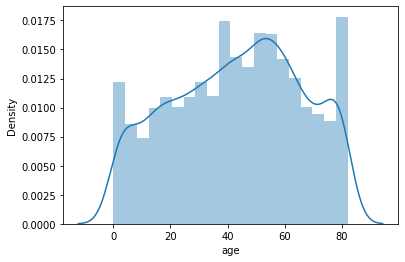

In [8]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='stroke', ylabel='count'>

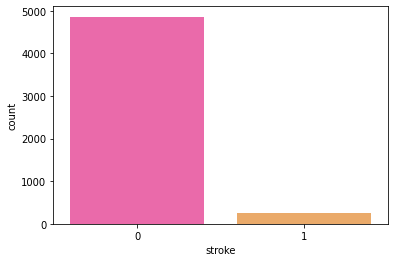

In [9]:
sns.countplot(x= "stroke",data= df,palette="spring")

countplot shows that affected peoples are very less in number

<AxesSubplot:xlabel='gender', ylabel='count'>

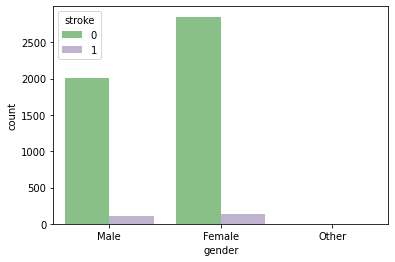

In [10]:
sns.countplot(x="gender",hue= "stroke",data=df,palette="Accent")

females have slightly higher number of stroke than men. This may be  because of Count of female is more than male.

In [11]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [12]:
def age_new(age):
    if age > 70 :
         return ('70+')
    elif age > 60:
        return ('60-70')
    elif age > 45:
        return ('60-45')
    elif age > 30:
        return ('45-30')
    elif age >18 :
        return ('18-30')
    elif age < 18:
        return ('0-18')
    else : 
        return None
    

In [13]:
df["age_gr"]= df["age"].apply(age_new)

In [14]:
df["age_gr"].value_counts()

60-45    1188
45-30    1048
0-18      856
70+       710
18-30     654
60-70     594
Name: age_gr, dtype: int64

<AxesSubplot:xlabel='age_gr', ylabel='count'>

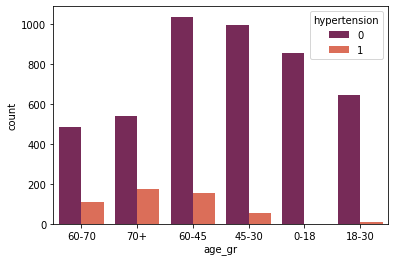

In [15]:
sns.countplot(x= "age_gr",hue="hypertension",data= df,palette= "rocket")

Age gr.0-18 have no hypertension and 70+ age have slightlty more hypertension than other age group.

<AxesSubplot:xlabel='age_gr', ylabel='count'>

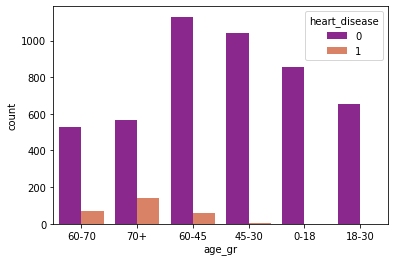

In [16]:
sns.countplot(x= "age_gr",hue="heart_disease",data=df,palette="plasma")

Age group 0-18, 18-30 dont have heart disease.

<AxesSubplot:xlabel='age_gr', ylabel='count'>

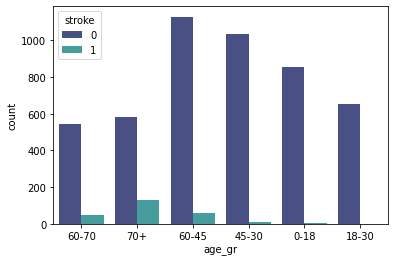

In [17]:
sns.countplot(x= "age_gr",hue="stroke",data=df,palette="mako")

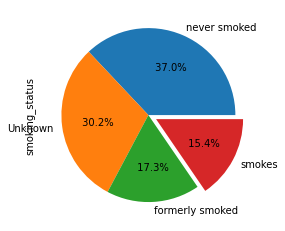

In [18]:
df["smoking_status"].value_counts().plot.pie(autopct=" %1.1f%%",explode=(0,0,0,0.1))
plt.show()

15.4% people smokes and 30.2% data is unknown.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

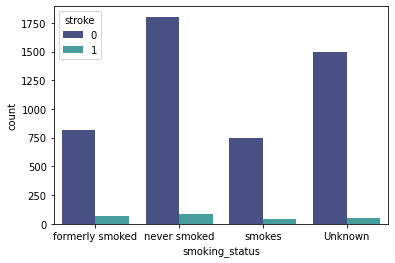

In [19]:
sns.countplot(x= "smoking_status",hue="stroke",data=df,palette="mako")

from countplot we can see that smoking-status of people have litile or no effect on predicting brain stroke.As people who never smoked also had brain stroke.

[]

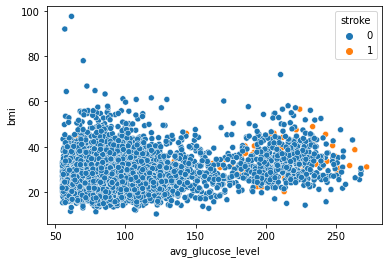

In [20]:
sns.scatterplot(data= df,x= "avg_glucose_level",y="bmi",hue="stroke")
plt.plot()

scatterplot shows that higher the avg glucose level more are the chances of stroke.

[]

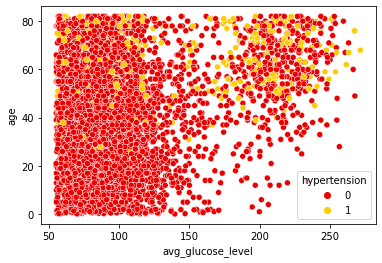

In [21]:
sns.scatterplot(data= df,x= "avg_glucose_level",y="age",hue="hypertension",palette="hot")
plt.plot()

scatterplot shows that higher the avg glucose level and age more are the chances of hypertension.

[]

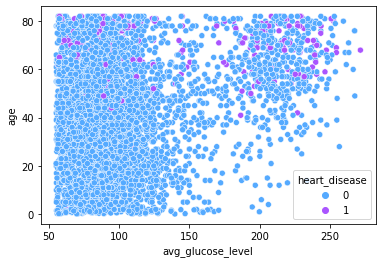

In [22]:
sns.scatterplot(data= df,x= "avg_glucose_level",y="age",hue="heart_disease",palette="cool")
plt.plot()

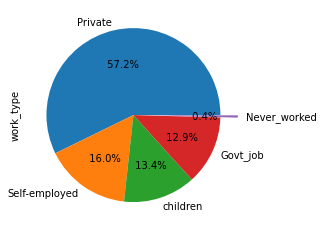

In [23]:
df["work_type"].value_counts().plot.pie(autopct=" %1.1f%%",explode=(0,0,0,0,0.2))
plt.show()

57.2% people are working in private sector.0.4 % people never worked.

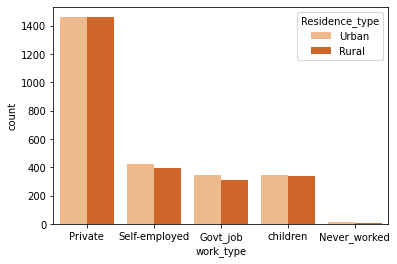

In [24]:
sns.countplot(data=df,x="work_type",hue="Residence_type",palette="Oranges")
plt.show()

As plot shows work type of urban and rural is almost same.

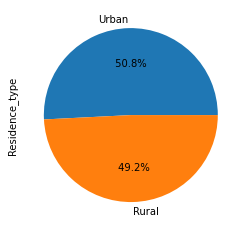

In [25]:
df["Residence_type"].value_counts().plot.pie(autopct=" %1.1f%%",explode=(0,0))
plt.show()

Population is same for urban and rural area.

<AxesSubplot:xlabel='gender', ylabel='count'>

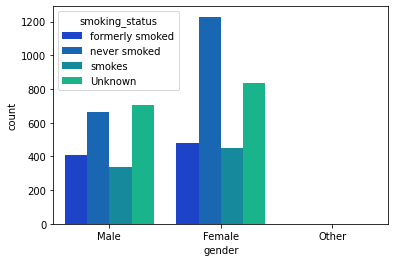

In [26]:
sns.countplot(x="gender",hue="smoking_status",data=df,palette="winter")

From Countplot we can say that in female gender,large numer of womens are never smoked.

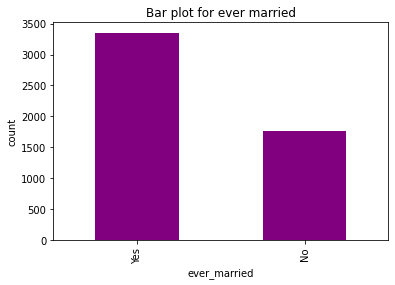

In [27]:
df["ever_married"].value_counts().plot(kind="bar",color="purple")
plt.title("Bar plot for ever married")
plt.xlabel("ever_married")
plt.ylabel("count")
plt.show()

<AxesSubplot:xlabel='ever_married', ylabel='count'>

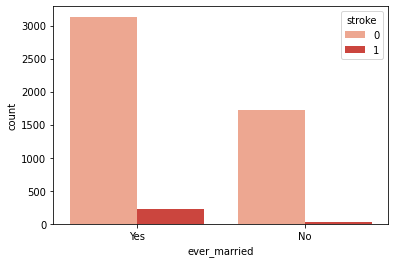

In [28]:
sns.countplot(data=df,x="ever_married",hue="stroke",palette="Reds")

In [29]:
df.drop(["age_gr"],axis=1,inplace =True)

<AxesSubplot:>

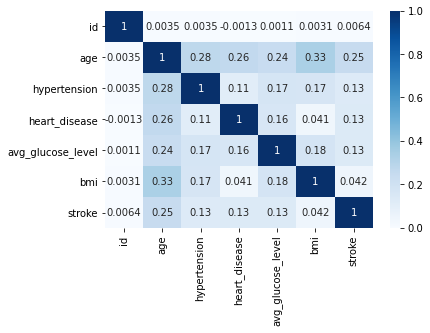

In [30]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Heatmap shows correlation of Stroke with age

In [31]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Handling the missing values

In [32]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [33]:

bmean= df['bmi'].mean()
df['bmi'].fillna(bmean,inplace = True)


In [34]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

all the missing values are filled now for bmi column.Now the dataset is ready for further analysis.

# Encode the catogorical columns with LabelEncoder

In [35]:
df_cat= df.select_dtypes(object)
df_num = df.select_dtypes(["int64","float64"])

In [36]:
for col in df_cat:
    le= LabelEncoder()
    df_cat[col]= le.fit_transform(df_cat[col])

In [37]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


In [38]:
df_cat["gender"].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [39]:
df= pd.concat([df_cat,df_num],axis=1)



In [40]:
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,51676,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.000000,1


In [41]:
df.drop(["id"],axis=1,inplace= True)

# Divide the dataset into X and Y

In [42]:
x= df.iloc[:,1:-1].values
y= df.iloc[:,-1].values

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

# Handling the Imbalanced data with imblearn

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state=1)

In [46]:
xsample,ysample = ros.fit_resample(xtrain,ytrain)

In [47]:
pd.Series(ysample).value_counts()

0    3403
1    3403
dtype: int64

# Model Building

In [48]:
def mymodel(model):
    model.fit(xsample,ysample)
    ypred= model.predict(xtest)
    print(f"Accutacy :-{accuracy_score(ytest,ypred)}\n\nConfusion Metrix:\n{confusion_matrix(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

In [49]:
models= []

models.append(("logreg   -:",LogisticRegression()))
models.append(("SVM-l     -:",SVC(kernel="linear")))

for name,model in models:
    print(name)
    mymodel(model)

logreg   -:
Accutacy :-0.741030658838878

Confusion Metrix:
[[1079  379]
 [  18   57]]

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1458
           1       0.13      0.76      0.22        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.74      0.81      1533

SVM-l     -:
Accutacy :-0.7325505544683627

Confusion Metrix:
[[1064  394]
 [  16   59]]

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1458
           1       0.13      0.79      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.76      0.53      1533
weighted avg       0.94      0.73      0.81      1533



# Hyperparameter Tunning for LogisticRegression

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
para = {"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"C":[0.1,1,10,100,1000]}

In [52]:
logreg= LogisticRegression()

In [53]:
grid= GridSearchCV(logreg,para,refit=True,verbose=3)
grid.fit(xsample,ysample)
ypred= grid.predict(xtest)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.780 total time=   0.2s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.783 total time=   0.2s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.779 total time=   0.1s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.773 total time=   0.1s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.786 total time=   0.1s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.772 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear

[CV 2/5] END ..........C=1000, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 3/5] END ..........C=1000, solver=newton-cg;, score=0.771 total time=   0.1s
[CV 4/5] END ..........C=1000, solver=newton-cg;, score=0.781 total time=   0.1s
[CV 5/5] END ..........C=1000, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END ..............C=1000, solver=lbfgs;, score=0.779 total time=   0.1s
[CV 2/5] END ..............C=1000, solver=lbfgs;, score=0.771 total time=   0.1s
[CV 3/5] END ..............C=1000, solver=lbfgs;, score=0.777 total time=   0.1s
[CV 4/5] END ..............C=1000, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 5/5] END ..............C=1000, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 1/5] END ..........C=1000, solver=liblinear;, score=0.780 total time=   0.0s
[CV 2/5] END ..........C=1000, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END ..........C=1000, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END ..........C=100

In [54]:
grid.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [55]:
logreg= LogisticRegression(C= 0.1, solver= 'newton-cg')
logreg.fit(xsample,ysample)
ypred= logreg.predict(xtest)

In [56]:
print(f"Accuracy:- {accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

Accuracy:- 0.7436399217221135

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1458
           1       0.13      0.76      0.22        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.74      0.82      1533



# Naive Aggregation

In [57]:
models= []

models.append(("logreg   -:",LogisticRegression(C= 0.1, solver= 'newton-cg')))
models.append(("SVM-l     -:",SVC(kernel="linear")))


In [58]:
from sklearn.ensemble import VotingClassifier

In [59]:
vch= VotingClassifier(estimators=models)
vch.fit(xsample,ysample)
ypred = vch.predict(xtest)

In [60]:
print(f"Accuracy:- {accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

Accuracy:- 0.7442922374429224

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1458
           1       0.13      0.76      0.23        75

    accuracy                           0.74      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.74      0.82      1533



# Boosting Techniques

Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100)
gbc.fit(xsample,ysample)
ypred= gbc.predict(xtest)

In [62]:
print(f"Accuracy:- {accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

Accuracy:- 0.8016960208741031

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1458
           1       0.14      0.59      0.22        75

    accuracy                           0.80      1533
   macro avg       0.56      0.70      0.56      1533
weighted avg       0.93      0.80      0.85      1533



Xtreame gradient boosting

In [63]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(xsample,ysample)
ypred = xgb.predict(xtest)
print(f"Accuracy:- {accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")




[11:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:- 0.9334637964774951

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1458
           1       0.25      0.19      0.22        75

    accuracy                           0.93      1533
   macro avg       0.61      0.58      0.59      1533
weighted avg       0.92      0.93      0.93      1533



# Cross-validation

In [64]:

cvs = cross_val_score(logreg,xsample,ysample ,cv= 10,scoring ="accuracy")
    
print(f"LogisticRegression:\n",f"Accuracy : {cvs.mean()}, std : {cvs.std()}")

LogisticRegression:
 Accuracy : 0.7806372549019607, std : 0.015399372914329077


In [65]:
cvs = cross_val_score(xgb,xsample,ysample ,cv= 10,scoring ="accuracy")
    

[11:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [66]:
print(f"Xtreame Gradient Boosting:\n",f"Accuracy : {cvs.mean()}, std : {cvs.std()}")

Xtreame Gradient Boosting:
 Accuracy : 0.9800192191414011, std : 0.005805954148383671


# Conclusion

- The healthy lifestyle and other diseases play important role for brain stroke prediction.
- After performing all the analysis we can conclude that age,heart-disease,hypertension,high value of glucose are mainly  responsible factors that one should get brain stroke.